### **What is our goal?**

In this project, our goal is to gain a deeper understanding of flight data by conducting exploratory data analysis (EDA). We will apply a range of statistical techniques to explore and uncover insights, enhancing our familiarity with the dataset.

### **Import Libraries**

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### **Load data**

In [ ]:
df = pd.read_csv('FILE PATH')
df.head(2)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.


### **Analyze one sample variable**

Since it's not feasible to analyze all columns (variables) in this project, I will focus on analyzing one of them in detail. The same process can be applied to the remaining columns. So, I focus of `arra_delay` which showe how many minutes a flight had delay.

##### **1-On average, how many delay do flights have?**

In [ ]:
df['arr_delay'].mean()

6.89537675731489

The results indicate that, on average, every single flights has 6.8 minutes delay.
Mean always has a problem which is it's not robust against noise data (e.g. outlier).



In [ ]:
print(df['arr_delay'].min())
print(df['arr_delay'].max())

-86.0
1272.0


So, instead of basic mean, I use trim mean and cut the first and last 10% of data (for ignoring outliers).

In [ ]:
stats.trim_mean(
    df['arr_delay'],
    0.1
    )

0.9612355338465307

##### **2-How many minute do the majority of flights have dealy?**

For answering this question, we should find the median. It divids data into two categories. Less than 50% and more than 50%.

In [ ]:
df['arr_delay'].median()

-5.0

The result shows 50% of delay are less than -5 minutes and 50% of delay are more than -5 minutes.

##### **3-Which delay minute is the most frequent?**

In [ ]:
print(df['arr_delay'].mode())

0   -13.0
Name: arr_delay, dtype: float64


The result reveals that the most frequent delay is -13 minutes, meaning we have a higher number of flights departing 13 minutes earlier than the scheduled time compared to other delays or early departures.

##### **4-How much delay time is widespread?**

In [ ]:
df['arr_delay'].var()

1992.13072710194

Just because the result of variance does not have the same meaning as delay time, we have to use another method to translate it into minutes to interpret it. The only good thing about variance is to look at to see how small it can be (less, better)

In [ ]:
df['arr_delay'].std()

44.63329169019399

On average, every single flight is delayed by 44 minutes compared to the mean delay.

##### **5-How Does a Histogram Reveal Flight Delay Patterns?**

We want to first sort all the delay times and then divide them into 200 sections. After that, we will create a histogram chart showing the frequency of delays in each section. For example, it will show how many flights were delayed from 1 minute to 10 minutes.

Text(0.5, 0, 'Arrival Delay (minutes)')

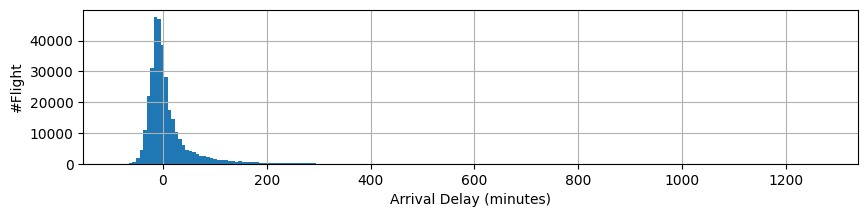

In [ ]:
plt.figure(figsize=(10, 2))
df['arr_delay'].hist(bins = 200)
plt.ylabel('#Flight')
plt.xlabel('Arrival Delay (minutes)')

The chart displays that the majority of the data falls between -50 and 200 minutes. Therefore, we will create a new histogram for this range.

Text(0.5, 0, 'Arrival Delay (minutes) (-50 to 100)')

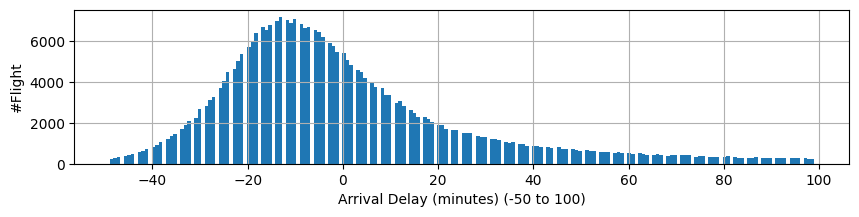

In [ ]:
plt.figure(figsize=(10, 2))
df['arr_delay'][(df['arr_delay'] > -50) & (df['arr_delay'] < 100)].hist(bins = 200)
plt.ylabel('#Flight')
plt.xlabel('Arrival Delay (minutes) (-50 to 100)')

If, we consider the delay arrival follows normal distrubution, we can check their spread based on 1σ, 2σ and 3σ.

*   1σ: 68% of data fall between ($\bar{x}$ - σ) ~ ($\bar{x}$ + σ)
*   2σ: 95% of data fall between ($\bar{x}$ - 2σ) ~ ($\bar{x}$ + 2σ)
*   3σ: 99% of data fall between ($\bar{x}$ - 3σ) ~ ($\bar{x}$ + 3σ)



In [ ]:
df['arr_delay'].mean() - (3 * df['arr_delay'].std())

-127.00449831326708

In [ ]:
df['arr_delay'].mean() + (3 * df['arr_delay'].std())

140.79525182789686

The result shows if the data follows normal distribution, 99% of data are between -127 minute to 140 minute dealy. We see there are outlier. So, we can see in which side the data has bias.

In [ ]:
df['arr_delay'].skew()

3.7168174804571863

It show, we have very big outlier and mean is more than mode.

##### **6-Draw Pearson correlation between numerical variables**

In [ ]:
subset_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = subset_df.corr(method='pearson') #if we want to see relationship with an ordinal categoricial variable, we use Spearman
column_correlation = correlation_matrix['arr_delay']
print(column_correlation)

id                0.018613
year                   NaN
month            -0.017382
day              -0.000319
dep_time          0.232306
sched_dep_time    0.173896
dep_delay         0.914803
arr_time          0.024482
sched_arr_time    0.133261
arr_delay         1.000000
flight            0.072862
air_time         -0.035297
distance         -0.061868
hour              0.173456
minute            0.021522
Name: arr_delay, dtype: float64


The result indicates that arrival delay has both positive and negative relationships with certain variables. For instance, an increase in departure time leads to an increase in arrival delay. However, for some variables, there is a weak negative relationship.